Lab 3 - Alaa Hallak

step 0: import libraries

In [ ]:
import pandas as pd
import sys
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
from math import radians, cos, sin, asin, sqrt
import datetime
from sklearn.linear_model import LinearRegression
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
sns.set(style="ticks")
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from xgboost import XGBClassifier

# Step 1: Scoping the Problem

1.   Define the Objective:

      **weather condition prediction**

2. Identify Inputs and Outputs

      **Inputs (features)**:  Precip type, Temperature, Apparent Temp, Humdidity, Wind speed, Wind Bearing, Visibility, Pressure, Daily summary

      **Output (target)**: Precip type (summary and Daily summary have too many categories so I changed it to precip type)

3. Problem Type


      **Classification** → Predict a category

4. Translate to a Data Science Task

     **Problem statement**: We want to build a model to predict weather condition.

     **Data science task**: classification.

     **Why it matters**: It helps communities and businesses make informed decisions, ranging from deciding when to evacuate for a storm, to managing energy demand, planning agricultural cycles, and ensuring the safety of air travel.

##Step 2: Data Collection/Acquisition

In [ ]:
from google.colab import drive
# 1. Mount Google Drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# 2. Define the path (adjust to where your file is located inside Drive)
file_path = '/content/drive/MyDrive/ECE333 labs/weatherHistory.csv'

# 3. Load the dataset
df = pd.read_csv(file_path)

# 4. Display first 5 rows
df.head(5)


,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.


# Step 3: Data Basic Preprocessing and Exploration (EDA)

Goal: Understand patterns and detect problems.

Check structure: number of rows, columns, data types.

Look for missing values: is the data complete?

Basic statistics: mean, median, variance of Voltage, Current, Power.

Visualization

In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96453 entries, 0 to 96452
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Formatted Date            96453 non-null  object 
 1   Summary                   96453 non-null  object 
 2   Precip Type               95936 non-null  object 
 3   Temperature (C)           96453 non-null  float64
 4   Apparent Temperature (C)  96453 non-null  float64
 5   Humidity                  96453 non-null  float64
 6   Wind Speed (km/h)         96453 non-null  float64
 7   Wind Bearing (degrees)    96453 non-null  float64
 8   Visibility (km)           96453 non-null  float64
 9   Loud Cover                96453 non-null  float64
 10  Pressure (millibars)      96453 non-null  float64
 11  Daily Summary             96453 non-null  object 
dtypes: float64(8), object(4)
memory usage: 8.8+ MB


In [ ]:
df.describe()

,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars)
count,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.0,96453.000000
mean,11.932678,10.855029,0.734899,10.810640,187.509232,10.347325,0.0,1003.235956
std,9.551546,10.696847,0.195473,6.913571,107.383428,4.192123,0.0,116.969906
min,-21.822222,-27.716667,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
25%,4.688889,2.311111,0.600000,5.828200,116.000000,8.339800,0.0,1011.900000
50%,12.000000,12.000000,0.780000,9.965900,180.000000,10.046400,0.0,1016.450000
75%,18.838889,18.838889,0.890000,14.135800,290.000000,14.812000,0.0,1021.090000
max,39.905556,39.344444,1.000000,63.852600,359.000000,16.100000,0.0,1046.380000


In [ ]:
print("Shape:", df.shape)




Shape: (96453, 12)


In [ ]:
print("\nData types:\n", df.dtypes)


Data types:
 Formatted Date               object
Summary                      object
Precip Type                  object
Temperature (C)             float64
Apparent Temperature (C)    float64
Humidity                    float64
Wind Speed (km/h)           float64
Wind Bearing (degrees)      float64
Visibility (km)             float64
Loud Cover                  float64
Pressure (millibars)        float64
Daily Summary                object
dtype: object


## Data Type Conversion

In [ ]:
# Time Series
df['DateTime'] = pd.to_datetime(df['Formatted Date'], utc= True)
df = df.drop(columns=['Formatted Date'])
df = df.set_index('DateTime')

In [ ]:
df.head(100)

,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
DateTime,,,,,,,,,,,
2006-03-31 22:00:00+00:00,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
2006-03-31 23:00:00+00:00,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2006-04-01 00:00:00+00:00,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
2006-04-01 01:00:00+00:00,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
2006-04-01 02:00:00+00:00,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.
...,...,...,...,...,...,...,...,...,...,...,...
2006-04-12 21:00:00+00:00,Overcast,rain,7.855556,6.122222,0.72,9.8049,11.0,15.0052,0.0,1006.56,Foggy overnight and breezy in the morning.
2006-04-12 22:00:00+00:00,Mostly Cloudy,rain,7.316667,6.211111,0.75,6.6654,326.0,15.8746,0.0,1007.07,Overcast throughout the day.
2006-04-12 23:00:00+00:00,Overcast,rain,7.244444,6.005556,0.75,7.1162,309.0,15.8746,0.0,1007.37,Overcast throughout the day.


In [ ]:
df.dtypes

,0
Summary,object
Precip Type,object
Temperature (C),float64
Apparent Temperature (C),float64
Humidity,float64
Wind Speed (km/h),float64
Wind Bearing (degrees),float64
Visibility (km),float64
Loud Cover,float64
Pressure (millibars),float64


## Handling Missing Values

In [ ]:
df.replace("?", np.nan, inplace=True)


In [ ]:
# Count missing values per column
missing_counts = df.isna().sum()
missing_percent = (missing_counts / len(df)) * 100

print("Missing Values:\n", missing_counts)
print("Missing %:\n", missing_percent)


Missing Values:
 Summary                       0
Precip Type                 517
Temperature (C)               0
Apparent Temperature (C)      0
Humidity                      0
Wind Speed (km/h)             0
Wind Bearing (degrees)        0
Visibility (km)               0
Loud Cover                    0
Pressure (millibars)          0
Daily Summary                 0
dtype: int64
Missing %:
 Summary                     0.000000
Precip Type                 0.536012
Temperature (C)             0.000000
Apparent Temperature (C)    0.000000
Humidity                    0.000000
Wind Speed (km/h)           0.000000
Wind Bearing (degrees)      0.000000
Visibility (km)             0.000000
Loud Cover                  0.000000
Pressure (millibars)        0.000000
Daily Summary               0.000000
dtype: float64


In [ ]:
df["Precip Type"] = df["Precip Type"].fillna("none")
#I wanted to treat null in precip type as a category to classify, since it means no rain/snow

In [ ]:
missing_counts = df.isna().sum()
missing_percent = (missing_counts / len(df)) * 100

print("Missing Values:\n", missing_counts)
print("Missing %:\n", missing_percent)


Missing Values:
 Summary                     0
Precip Type                 0
Temperature (C)             0
Apparent Temperature (C)    0
Humidity                    0
Wind Speed (km/h)           0
Wind Bearing (degrees)      0
Visibility (km)             0
Loud Cover                  0
Pressure (millibars)        0
Daily Summary               0
dtype: int64
Missing %:
 Summary                     0.0
Precip Type                 0.0
Temperature (C)             0.0
Apparent Temperature (C)    0.0
Humidity                    0.0
Wind Speed (km/h)           0.0
Wind Bearing (degrees)      0.0
Visibility (km)             0.0
Loud Cover                  0.0
Pressure (millibars)        0.0
Daily Summary               0.0
dtype: float64


##3. Exploratory Data Analysis (EDA)``

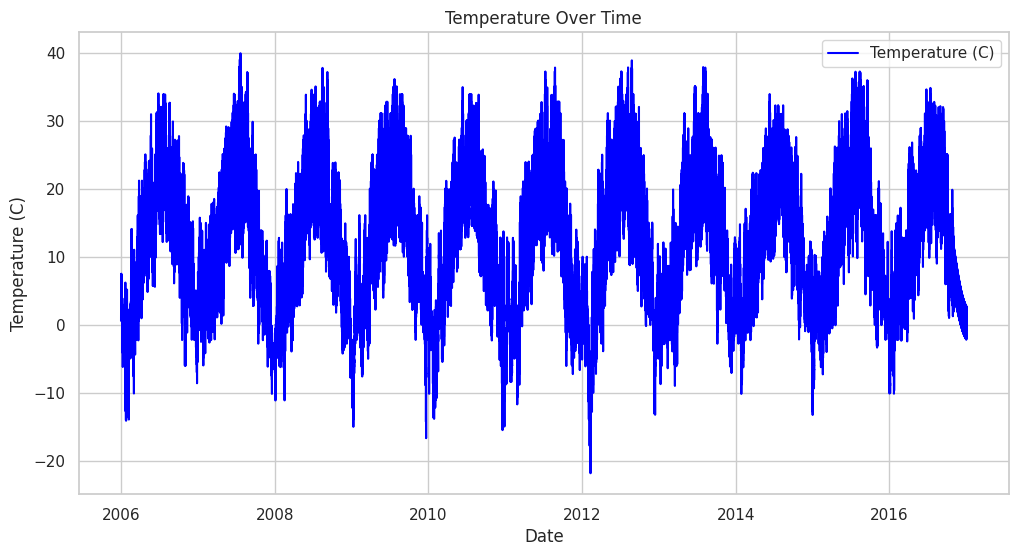

In [ ]:
sns.set(style="whitegrid")

plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x='DateTime', y='Temperature (C)', label='Temperature (C)', color='blue')

plt.xlabel('Date')
plt.ylabel('Temperature (C)')
plt.title('Temperature Over Time')

plt.show()

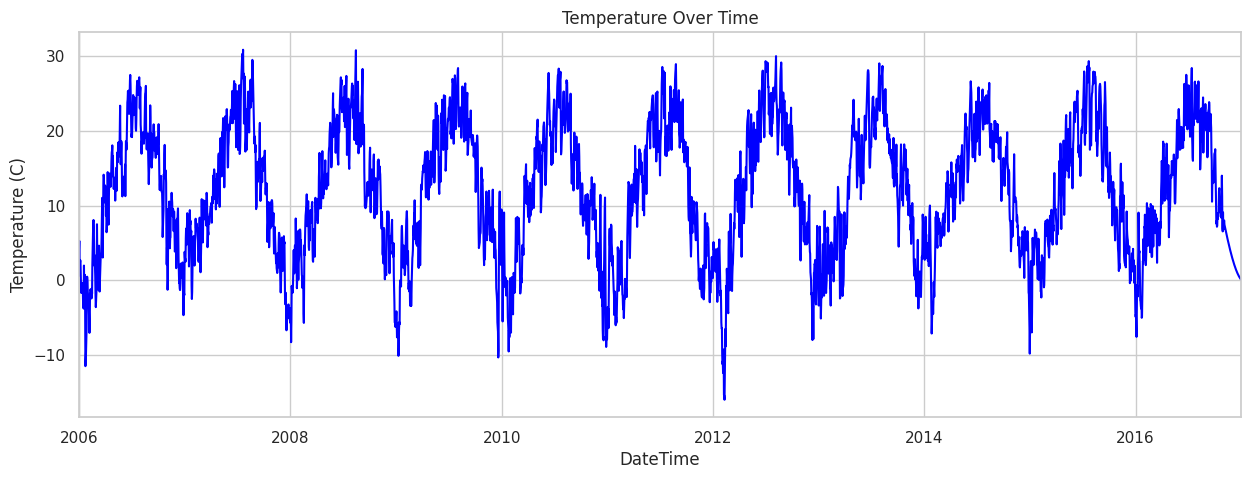

In [ ]:
df['Temperature (C)'].resample('D').mean().plot(figsize=(15,5), color='blue')
plt.title("Temperature Over Time")
plt.ylabel("Temperature (C)")
plt.show()


/tmp/ipython-input-3061620241.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df['Temperature (C)'].resample('M').mean().plot(figsize=(15,5))


<Axes: xlabel='DateTime'>

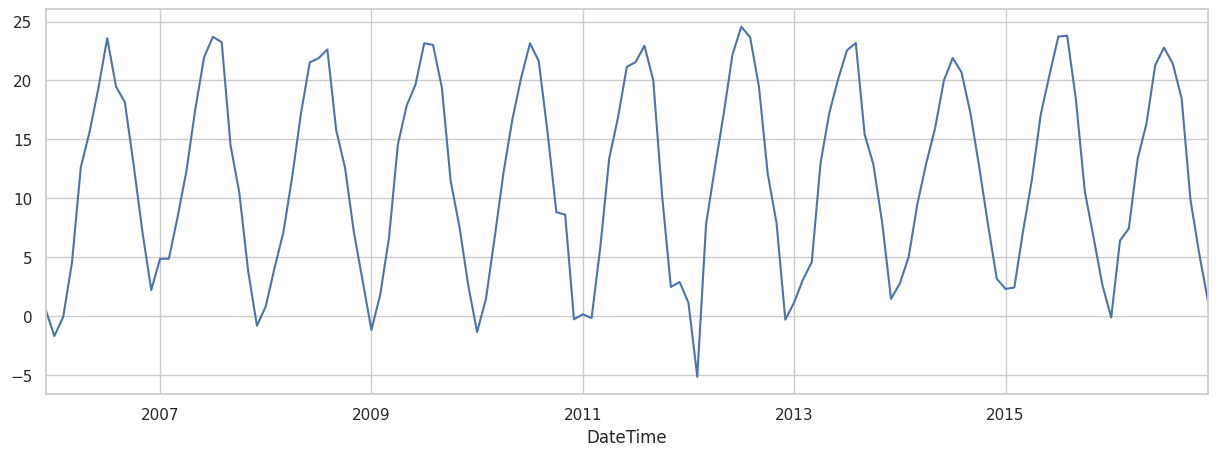

In [ ]:
df['Temperature (C)'].resample('M').mean().plot(figsize=(15,5))


## Advanced Preprocessing:  Feature Engineering

In [ ]:
# Extract features from DateTime index
df['hour'] = df.index.hour
df['dayofweek'] = df.index.dayofweek   # Monday=0, Sunday=6
df['month'] = df.index.month
df['year'] = df.index.year
df['is_weekend'] = df['dayofweek'].isin([5, 6]).astype(int)
df.head(10)

,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary,hour,dayofweek,month,year,is_weekend
DateTime,,,,,,,,,,,,,,,,
2006-03-31 22:00:00+00:00,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.,22,4,3,2006,0
2006-03-31 23:00:00+00:00,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.,23,4,3,2006,0
2006-04-01 00:00:00+00:00,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.,0,5,4,2006,1
2006-04-01 01:00:00+00:00,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.,1,5,4,2006,1
2006-04-01 02:00:00+00:00,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.,2,5,4,2006,1
2006-04-01 03:00:00+00:00,Partly Cloudy,rain,9.222222,7.111111,0.85,13.9587,258.0,14.9569,0.0,1016.66,Partly cloudy throughout the day.,3,5,4,2006,1
2006-04-01 04:00:00+00:00,Partly Cloudy,rain,7.733333,5.522222,0.95,12.3648,259.0,9.9820,0.0,1016.72,Partly cloudy throughout the day.,4,5,4,2006,1
2006-04-01 05:00:00+00:00,Partly Cloudy,rain,8.772222,6.527778,0.89,14.1519,260.0,9.9820,0.0,1016.84,Partly cloudy throughout the day.,5,5,4,2006,1
2006-04-01 06:00:00+00:00,Partly Cloudy,rain,10.822222,10.822222,0.82,11.3183,259.0,9.9820,0.0,1017.37,Partly cloudy throughout the day.,6,5,4,2006,1


##Machine Learning

In [ ]:
#from sklearn.model_selection import train_test_split (put it in step 0)

# Drop rows with NaN in 'Precip Type' before splitting
df_clean = df.dropna(subset=['Precip Type']).copy()

X = df_clean.drop(columns=['Summary', 'Precip Type', 'Daily Summary'])
y = df_clean['Precip Type']

# chronological split: 80% train, 20% test
split = int(len(X)*0.8)
X_train, X_test = X.iloc[:split], X.iloc[split:]
y_train, y_test = y.iloc[:split], y.iloc[split:]

In [ ]:
#from sklearn.preprocessing import StandardScaler (put it in step 0)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
X = pd.get_dummies(df, columns=['dayofweek','month'], drop_first=True)


In [ ]:
# Drop rows with NaN in either features or target
df_clean = df[['Temperature (C)',	'Apparent Temperature (C)',	'Humidity',
               'Wind Speed (km/h)',	'Wind Bearing (degrees)',
              'Visibility (km)',	'Loud Cover',	'Pressure (millibars)','Precip Type']].dropna()

# Split again
X = df_clean[['Temperature (C)',	'Apparent Temperature (C)',	'Humidity',
              'Wind Speed (km/h)',	'Wind Bearing (degrees)',
              'Visibility (km)',	'Loud Cover',	'Pressure (millibars)']]
y = df_clean['Precip Type']

In [ ]:
# Encode summary labels
#turn text labels into numbers so the machine learning model can understand them.
le = LabelEncoder()
y = le.fit_transform(y)
print(le.classes_)


[0 1 2]


#Random forest classifier

In [ ]:
# Train classifier
rf = RandomForestClassifier(
    n_estimators=200,
    class_weight="balanced",
    random_state=42
)

# Fit the model using scaled training data and encoded labels
rf.fit(X_train_scaled, y_train)

# Make predictions on scaled test data
y_pred = rf.predict(X_test_scaled)

In [ ]:
#Evaluation
# Detailed Classification Report
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

        none       0.00      0.00      0.00       374
        rain       0.98      1.00      0.99     17584
        snow       1.00      1.00      1.00      1333

    accuracy                           0.98     19291
   macro avg       0.66      0.67      0.66     19291
weighted avg       0.96      0.98      0.97     19291



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


#Gradient Boosting

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report

# Initialize and train the model
gb = GradientBoostingClassifier(n_estimators=200, learning_rate=0.1, random_state=42)
gb.fit(X_train_scaled, y_train)

# Predict and evaluate
y_pred_gb = gb.predict(X_test_scaled)
print("Gradient Boosting Classification Report:")
print(classification_report(y_test, y_pred_gb))

Gradient Boosting Classification Report:
              precision    recall  f1-score   support

        none       0.00      0.00      0.00       374
        rain       0.98      1.00      0.99     17584
        snow       1.00      1.00      1.00      1333

    accuracy                           0.98     19291
   macro avg       0.66      0.67      0.66     19291
weighted avg       0.96      0.98      0.97     19291



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


#XGBoost (Extreme Gradient Boosting)

In [ ]:
# Encode labels
le = LabelEncoder()
y_train_encoded = le.fit_transform(y_train)
y_test_encoded = le.transform(y_test)

# Train XGBoost with encoded labels
xgb = XGBClassifier(n_estimators=200, learning_rate=0.1, use_label_encoder=False, eval_metric='mlogloss', random_state=42)
xgb.fit(X_train_scaled, y_train_encoded)

# Predict and decode back to original labels (optional)
y_pred_encoded = xgb.predict(X_test_scaled)
y_pred = le.inverse_transform(y_pred_encoded)

# Evaluate
from sklearn.metrics import classification_report
print("XGBoost Classification Report:")
print(classification_report(y_test, y_pred))

/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [21:09:30] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBoost Classification Report:
              precision    recall  f1-score   support

        none       0.00      0.00      0.00       374
        rain       0.98      1.00      0.99     17584
        snow       0.99      0.99      0.99      1333

    accuracy                           0.98     19291
   macro avg       0.66      0.66      0.66     19291
weighted avg       0.96      0.98      0.97     19291



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


#Comparison of ensemble methods

*  All three models perform very well overall, with high accuracy and excellent scores for "rain" and "snow".

*  However, none of them correctly predicted the "none" class since there is a class imbalance

*  XGBoost shows slightly better handling of the "snow" class compared to Gradient Boosting and Random Forest, but still fails on "none".



Random Forest, Gradient Boosting, and XGBoost are machine learning methods that use many decision trees to make better predictions. Random Forest builds trees independently and takes the average result, which makes it stable and easy to use. Gradient Boosting builds trees one after another, learning from mistakes each time, so it can be more accurate but slower. XGBoost is a faster and smarter version of Gradient Boosting, it works well with large data, handles missing values, and gives strong results. **For predicting weather in the real world, XGBoost is a great choice because it’s fast, accurate, and can understand complex patterns in the data.**